In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [ ]:
sample_sub = pd.read_csv("/content/drive/MyDrive/titanic/sample_submission.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")

df_test


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")

df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


**Data Preprocessing**

In [ ]:

df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df_test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [ ]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
df_train.shape

(8693, 14)

In [ ]:
df_test.shape

(4277, 13)

**Null Value Remove**

In [ ]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

df_train['RoomService'].fillna(0,inplace=True)
df_train['FoodCourt'].fillna(0,inplace=True)
df_train['ShoppingMall'].fillna(0,inplace=True)
df_train['VRDeck'].fillna(0,inplace=True)
df_train['Spa'].fillna(0,inplace=True)

In [ ]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

df_test['RoomService'].fillna(0,inplace=True)
df_test['FoodCourt'].fillna(0,inplace=True)
df_test['ShoppingMall'].fillna(0,inplace=True)
df_test['VRDeck'].fillna(0,inplace=True)
df_test['Spa'].fillna(0,inplace=True)

**Correlation**

In [ ]:
# Find the pearson correlations matrix
corr_test = df_test.corr(method = 'pearson')
corr_test

<ipython-input-17-9862ea305188>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_test = df_test.corr(method = 'pearson')


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.062949,0.106562,0.037468,0.104396,0.102168
RoomService,0.062949,1.000000,-0.030386,0.061400,0.007010,-0.032575
FoodCourt,0.106562,-0.030386,1.000000,0.026025,0.236745,0.274970
ShoppingMall,0.037468,0.061400,0.026025,1.000000,0.004543,0.025116
Spa,0.104396,0.007010,0.236745,0.004543,1.000000,0.141331
VRDeck,0.102168,-0.032575,0.274970,0.025116,0.141331,1.000000


In [ ]:
# Find the pearson correlations matrix
corr_train = df_train.corr(method = 'pearson')
corr_train

<ipython-input-18-f904834b7adc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train = df_train.corr(method = 'pearson')


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068425,0.127343,0.032846,0.121071,0.099551,-0.074249
RoomService,0.068425,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.127343,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.032846,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.121071,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,0.099551,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874
Transported,-0.074249,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000


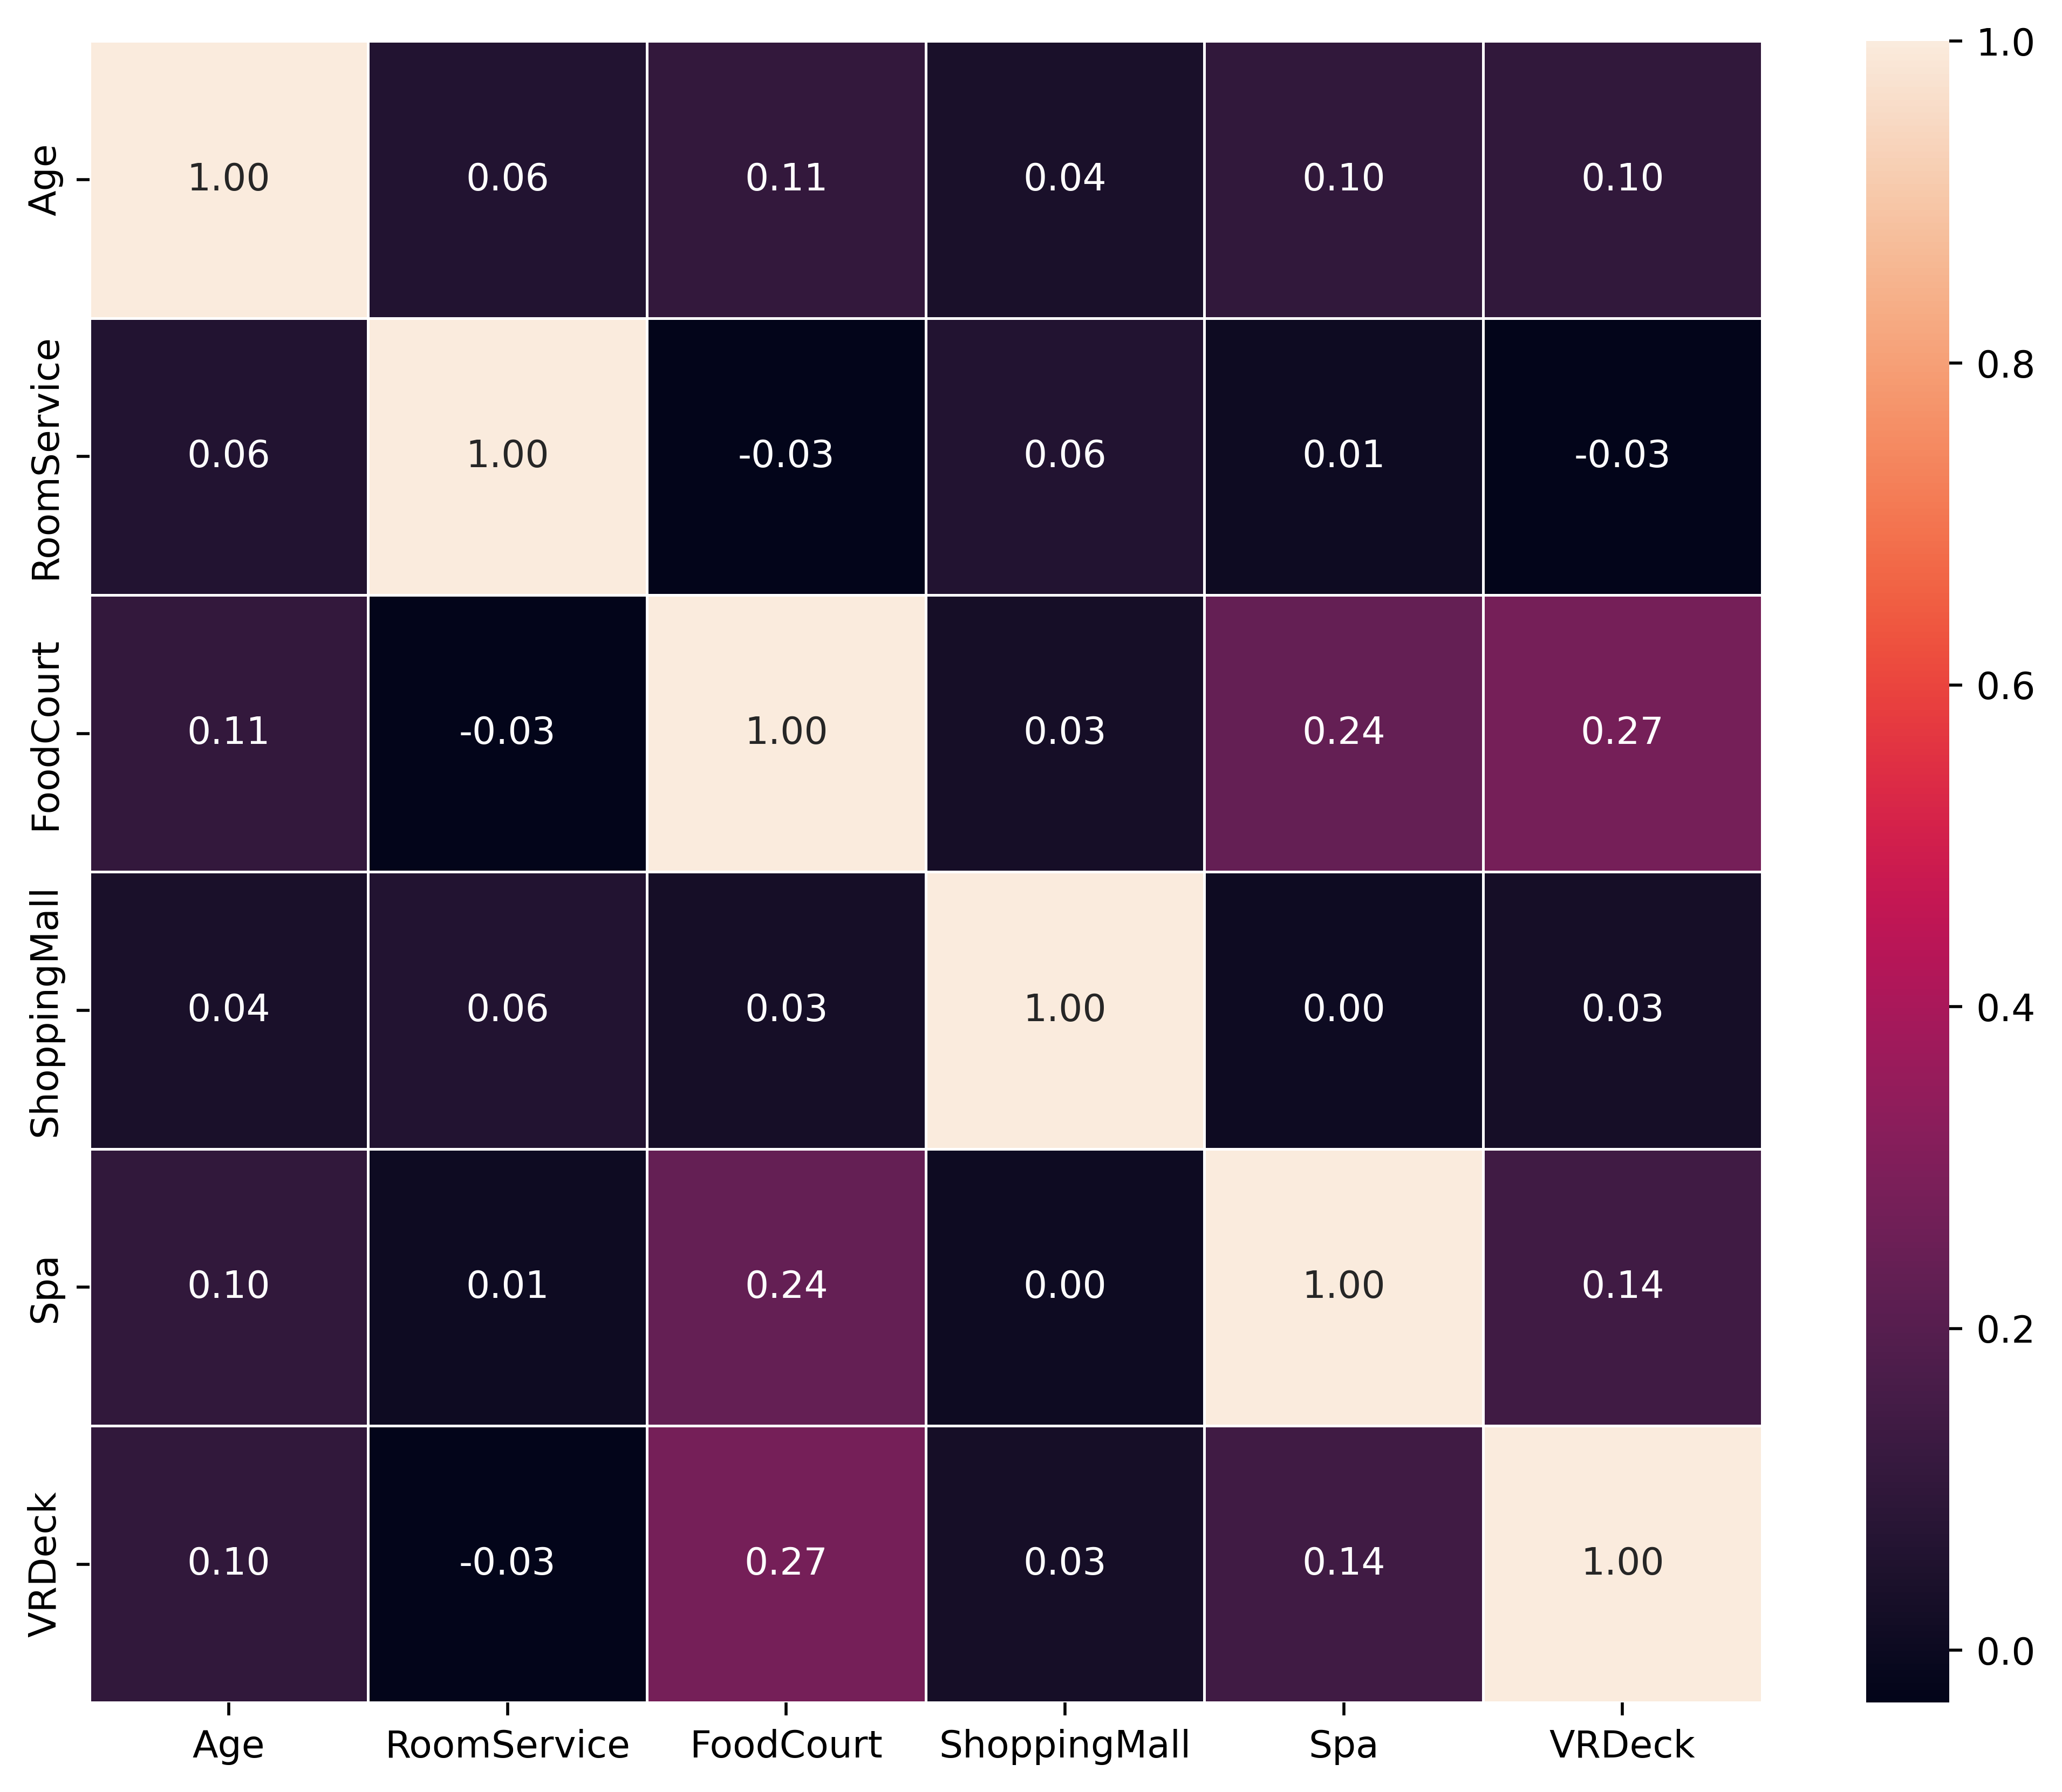

In [ ]:
#Plot the correlation matrix with the seaborn heatmap
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr_test,annot=True,fmt=".2f", linewidth=.5)
plt.show()

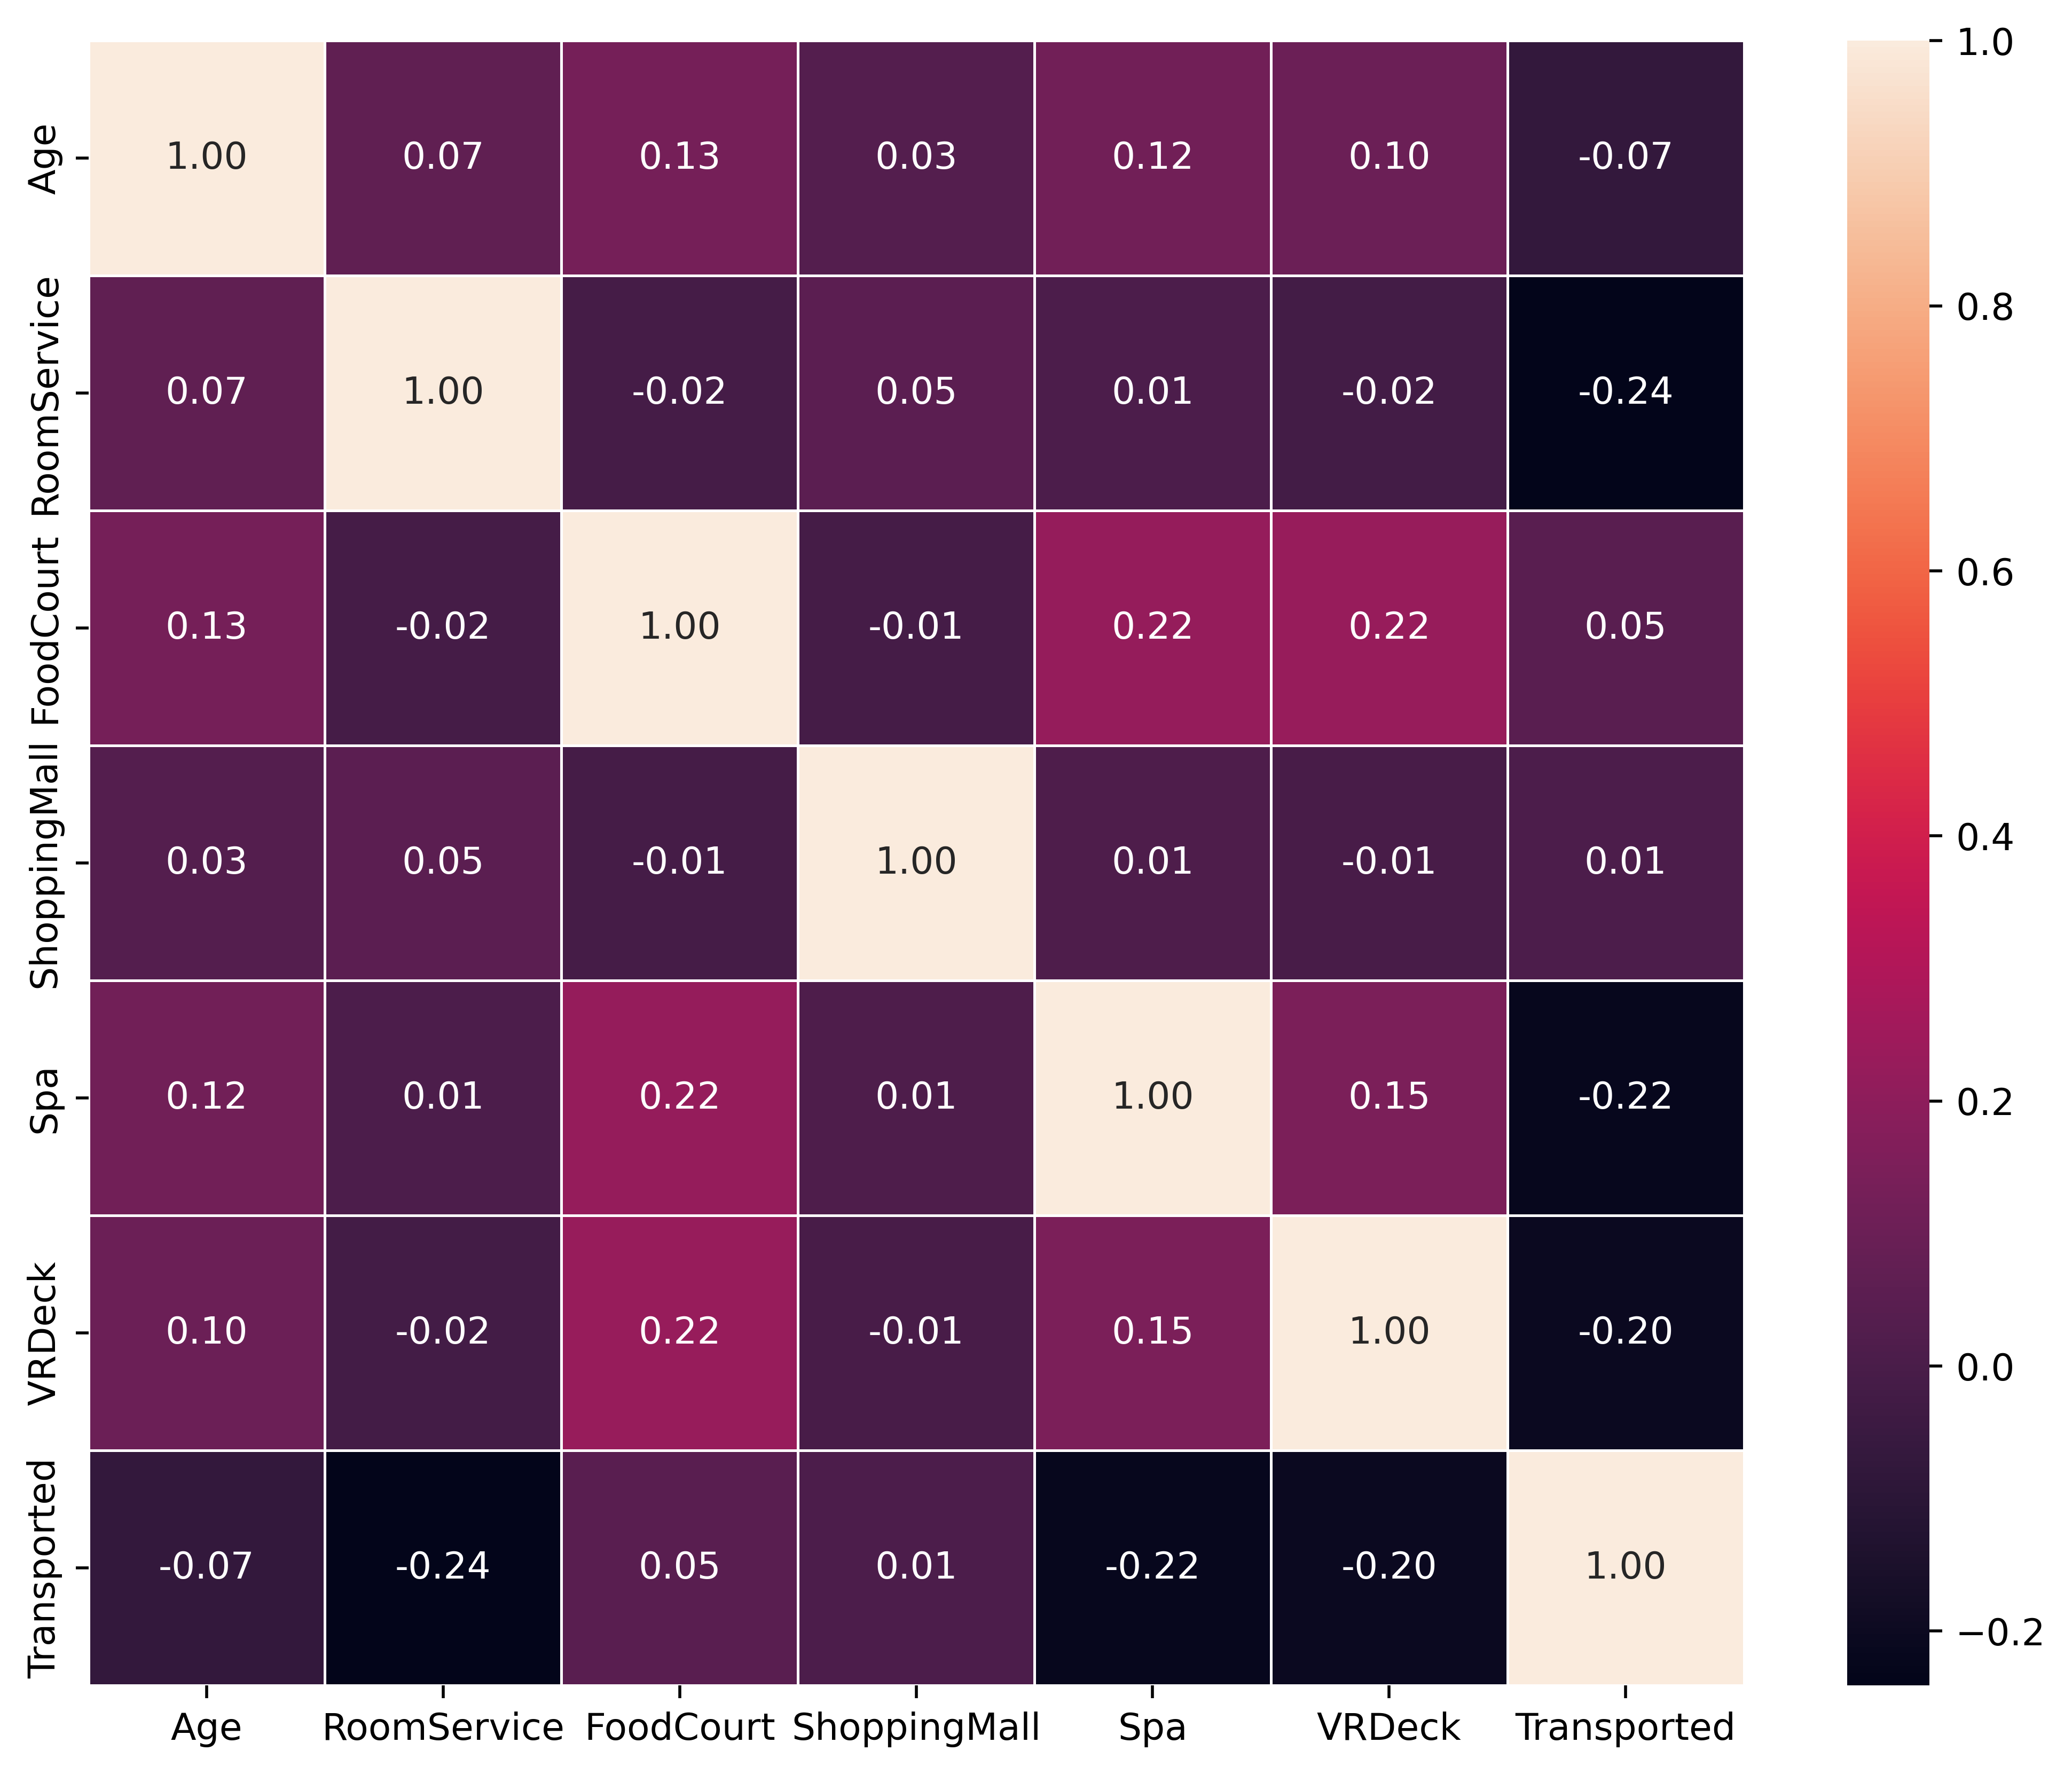

In [ ]:
#Plot the correlation matrix with the seaborn heatmap
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr_train,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [ ]:
df_test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [ ]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [ ]:
numeric_columns_test = df_test.select_dtypes(include=['number'])
numeric_columns_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.000000,0.0,0.0,0.0,0.0,0.0
1,19.000000,0.0,9.0,0.0,2823.0,0.0
2,31.000000,0.0,0.0,0.0,0.0,0.0
3,38.000000,0.0,6652.0,0.0,181.0,585.0
4,20.000000,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0
4274,28.658146,0.0,0.0,0.0,0.0,0.0
4275,28.658146,0.0,2680.0,0.0,0.0,523.0


In [ ]:
numeric_columns_train = df_train.select_dtypes(include=['number'])
numeric_columns_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
df_test2 = df_test
df_train2 = df_train

**Data Visualisation**

**1. Histogram for Numeric Columns**

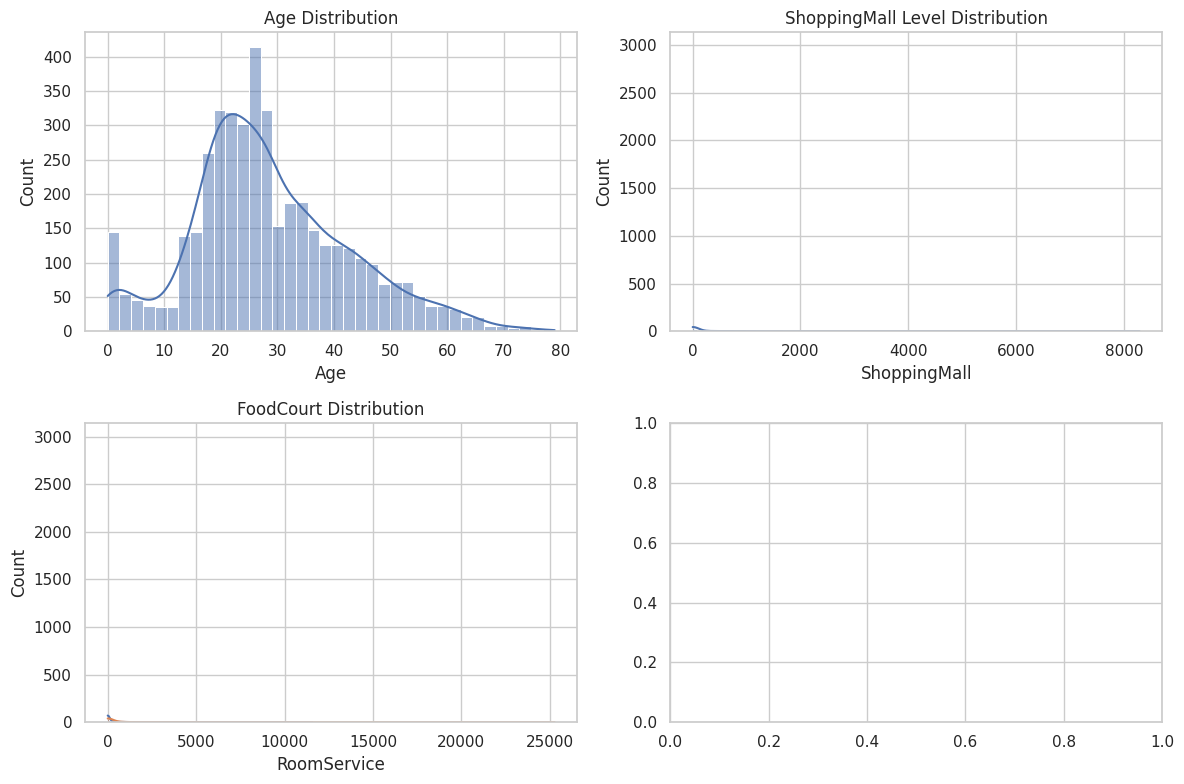

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms
sns.histplot(df_test2['Age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(df_test2['ShoppingMall'], kde=True, ax=axes[0, 1]).set_title('ShoppingMall Level Distribution')
sns.histplot(df_test2['RoomService'], kde=True, ax=axes[1, 0]).set_title('RoomService Distribution')
sns.histplot(df_test2['FoodCourt'], kde=True, ax=axes[1, 0]).set_title('FoodCourt Distribution')

# Show the plot
plt.tight_layout()
plt.show()


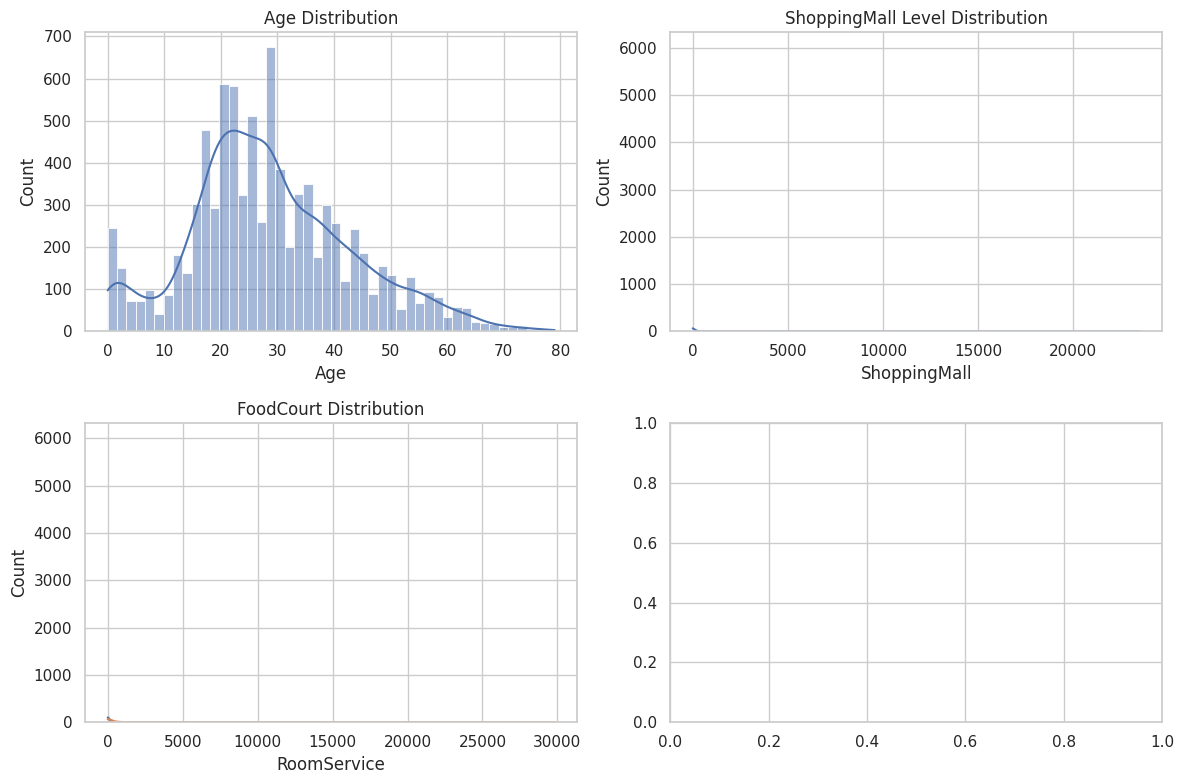

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms
sns.histplot(df_train2['Age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(df_train2['ShoppingMall'], kde=True, ax=axes[0, 1]).set_title('ShoppingMall Level Distribution')
sns.histplot(df_train2['RoomService'], kde=True, ax=axes[1, 0]).set_title('RoomService Distribution')
sns.histplot(df_train2['FoodCourt'], kde=True, ax=axes[1, 0]).set_title('FoodCourt Distribution')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
categorical_columns_test = df_test2.select_dtypes(include=['object', 'category'])

categorical_columns_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez
...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,False,Kitakan Conale


In [ ]:
categorical_columns_train = df_train2.select_dtypes(include=['object', 'category'])

categorical_columns_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


**2. Countplot for Categorical Columns**

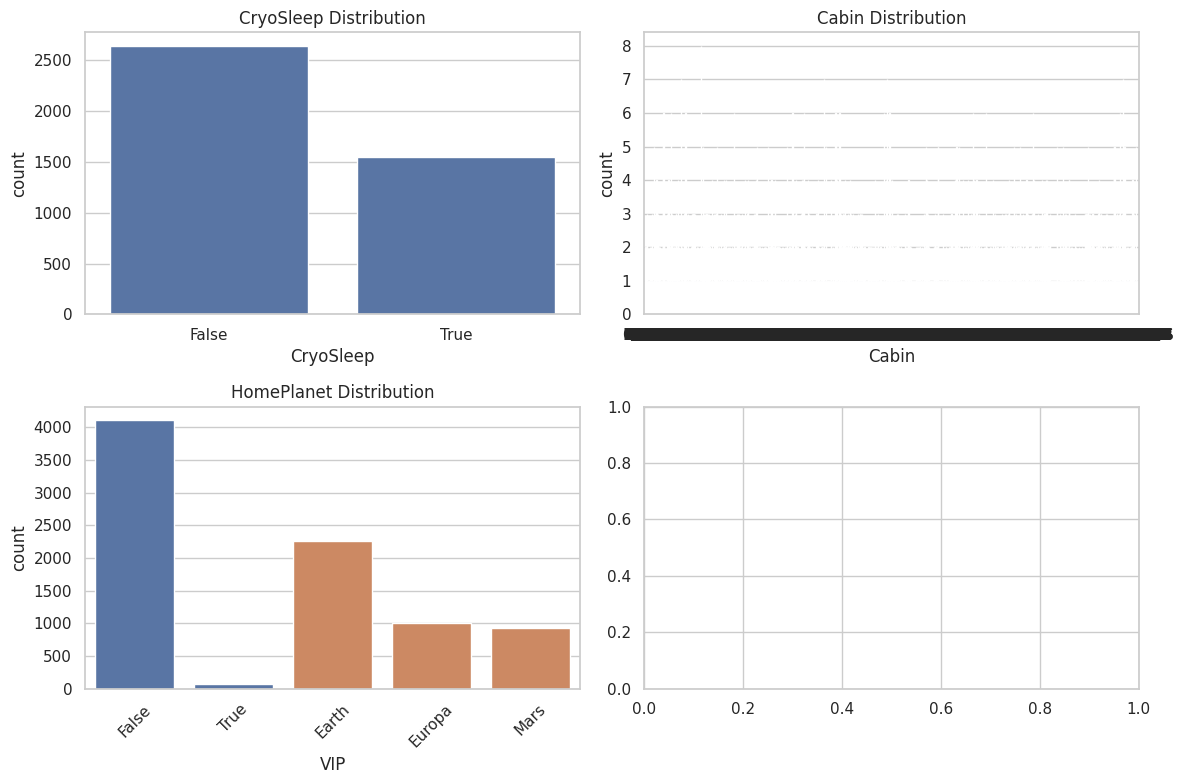

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot countplots
sns.countplot(x='CryoSleep', data=df_test2, ax=axes[0, 0]).set_title('CryoSleep Distribution')
sns.countplot(x='Cabin', data=df_test2, ax=axes[0, 1]).set_title('Cabin Distribution')
sns.countplot(x='VIP', data=df_test2, ax=axes[1, 0]).set_title('VIP Distribution')
sns.countplot(x='HomePlanet', data=df_test2, ax=axes[1, 0]).set_title('HomePlanet Distribution')

# Rotate x-axis labels for better readability
axes[1, 0].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

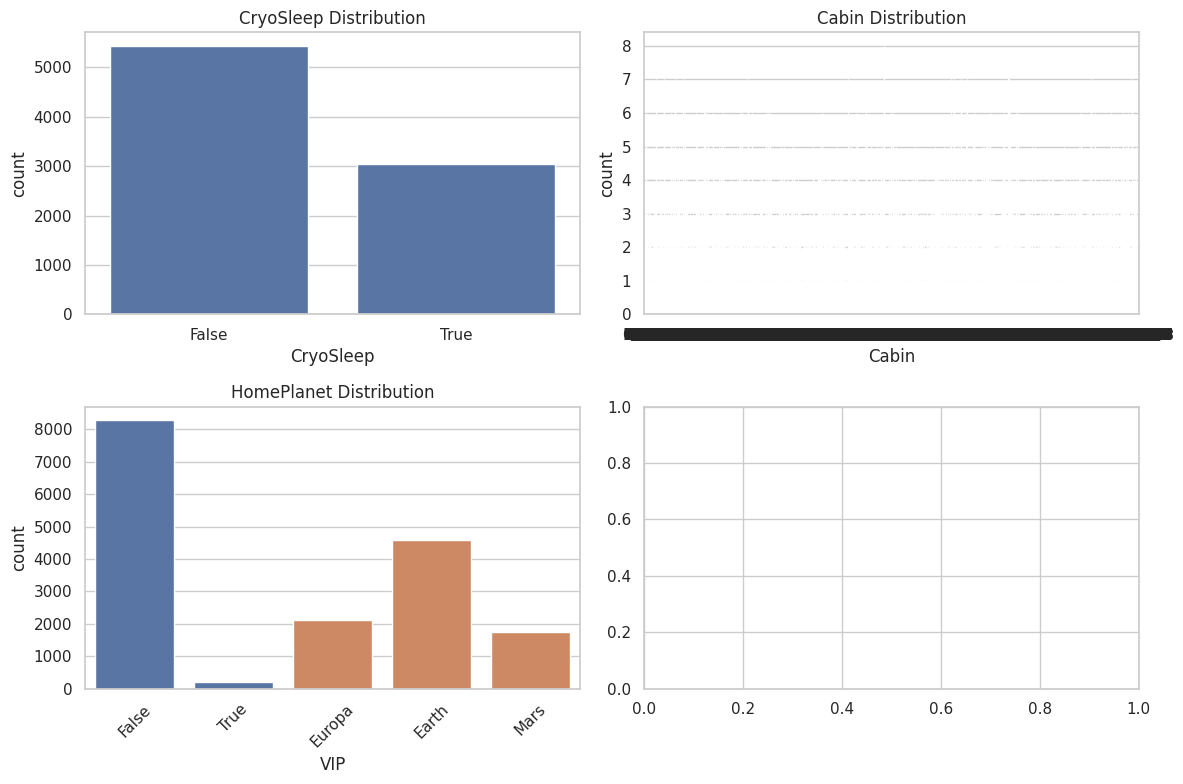

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot countplots
sns.countplot(x='CryoSleep', data=df_train2, ax=axes[0, 0]).set_title('CryoSleep Distribution')
sns.countplot(x='Cabin', data=df_train2, ax=axes[0, 1]).set_title('Cabin Distribution')
sns.countplot(x='VIP', data=df_train2, ax=axes[1, 0]).set_title('VIP Distribution')
sns.countplot(x='HomePlanet', data=df_train2, ax=axes[1, 0]).set_title('HomePlanet Distribution')

# Rotate x-axis labels for better readability
axes[1, 0].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df_test2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
df_train2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


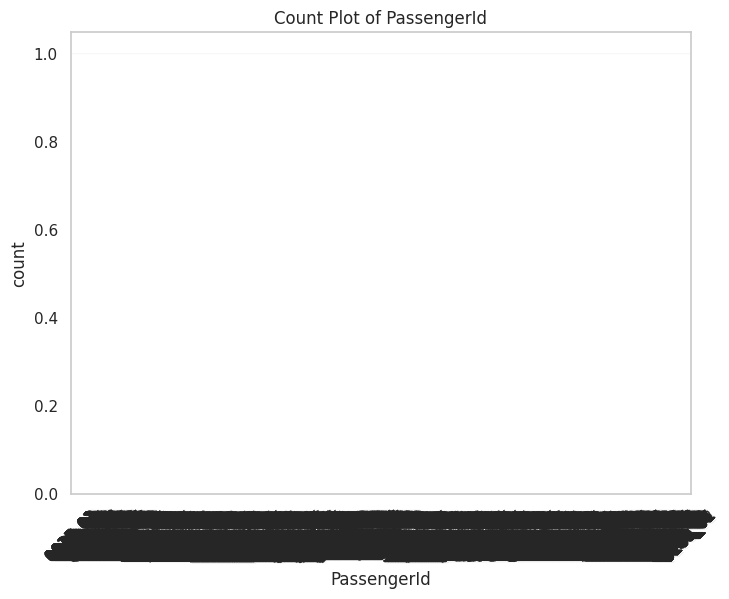

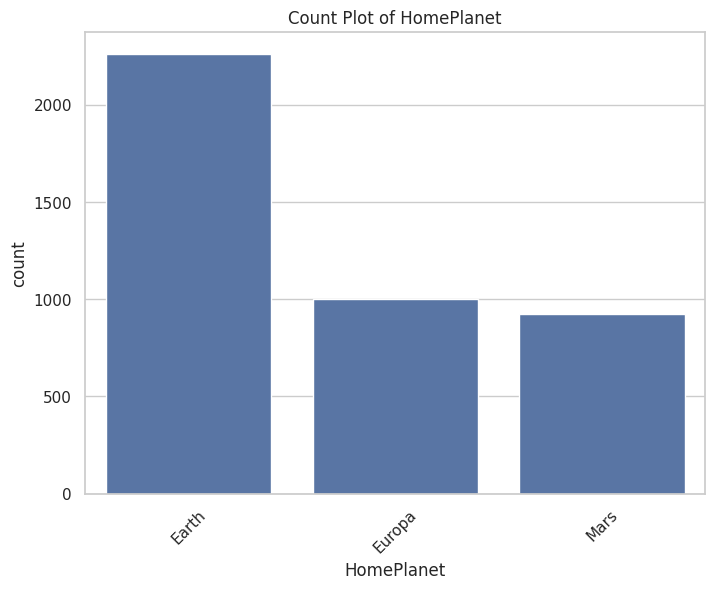

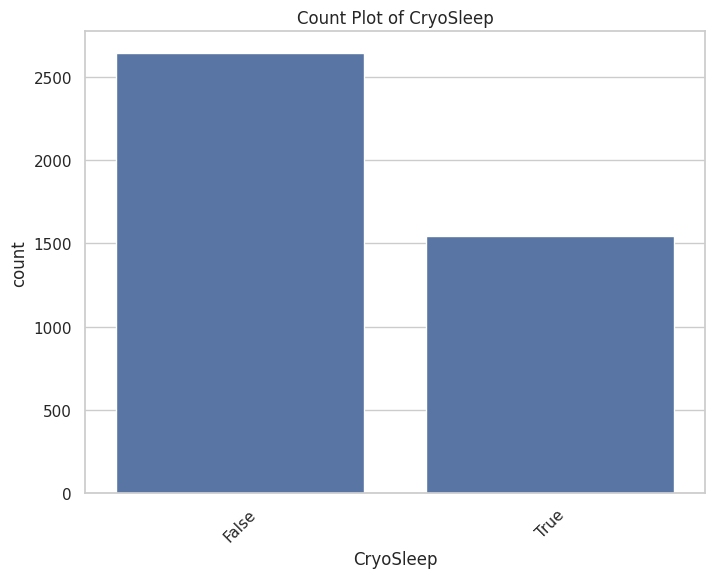

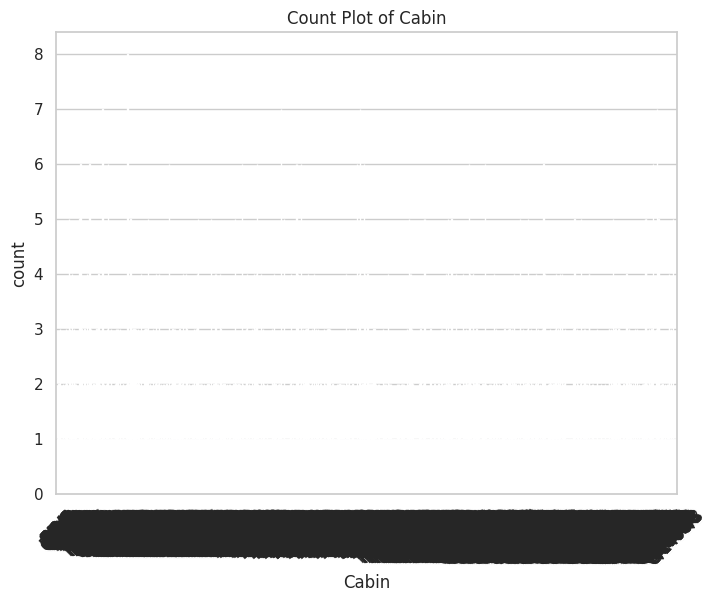

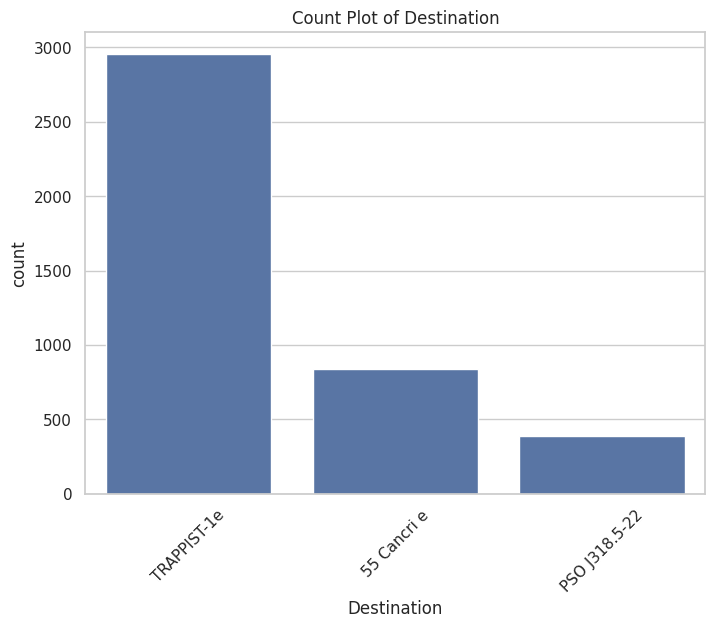

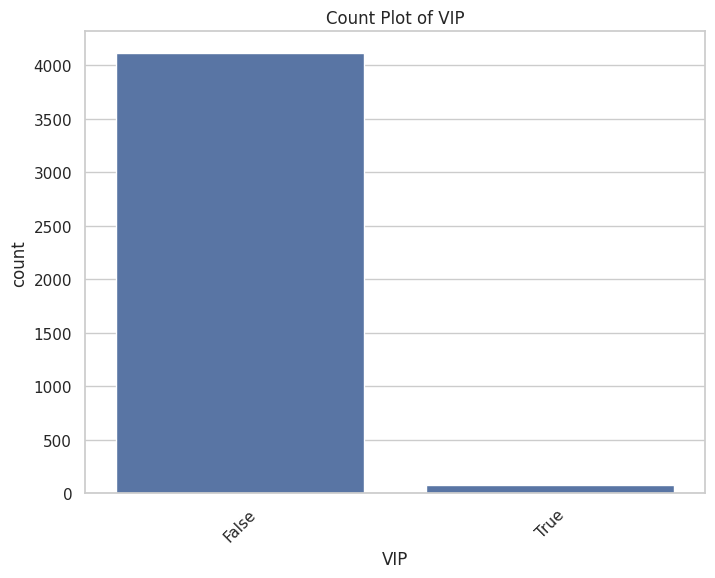

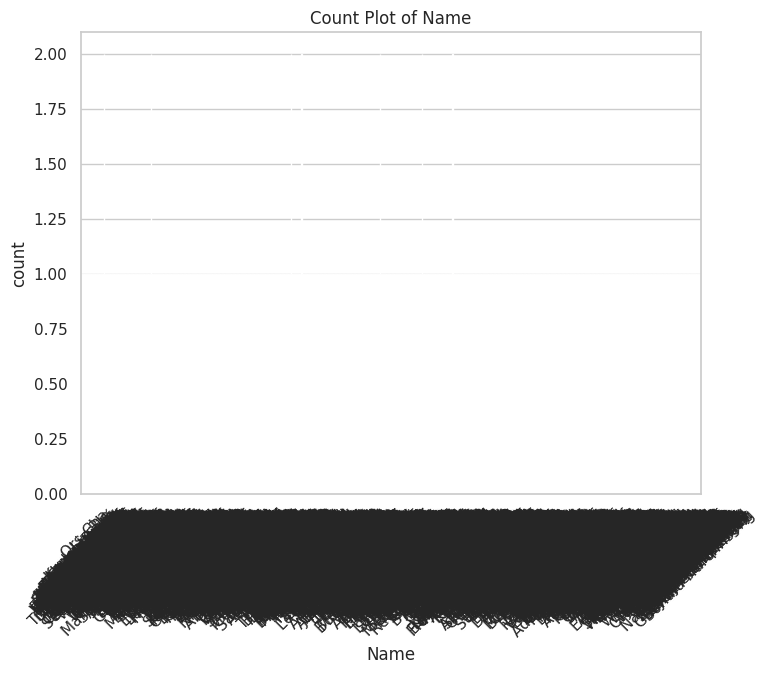

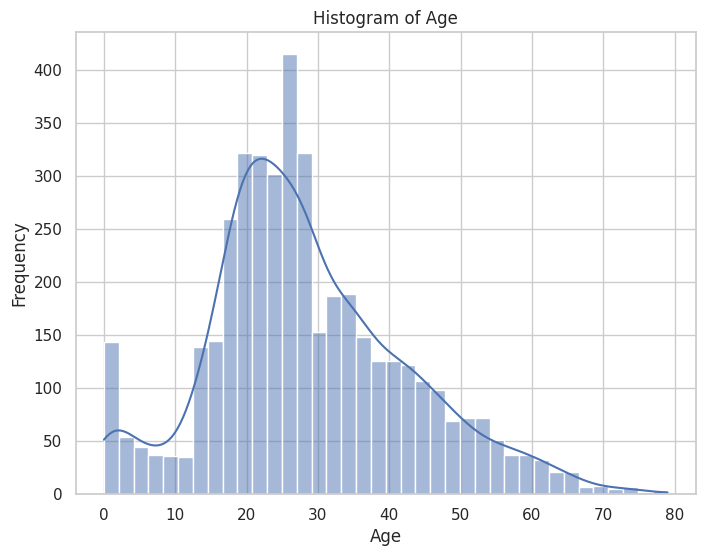

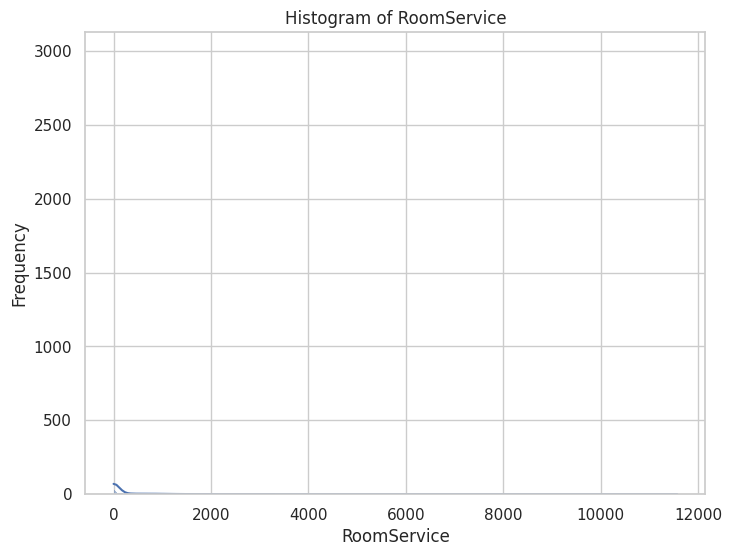

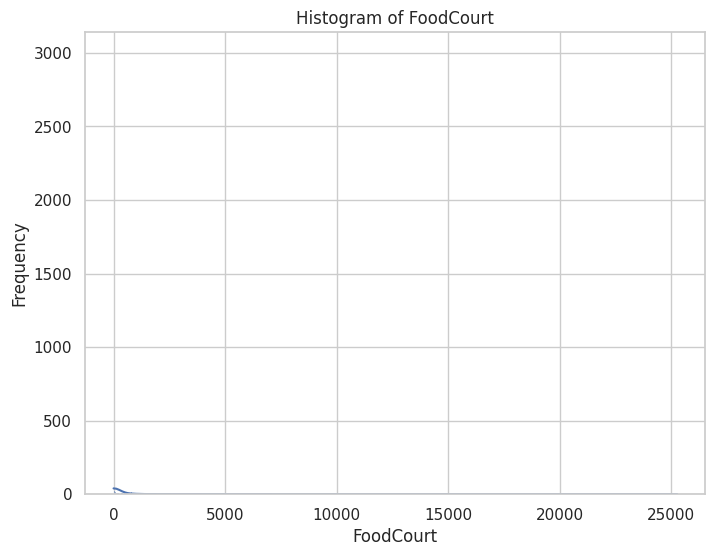

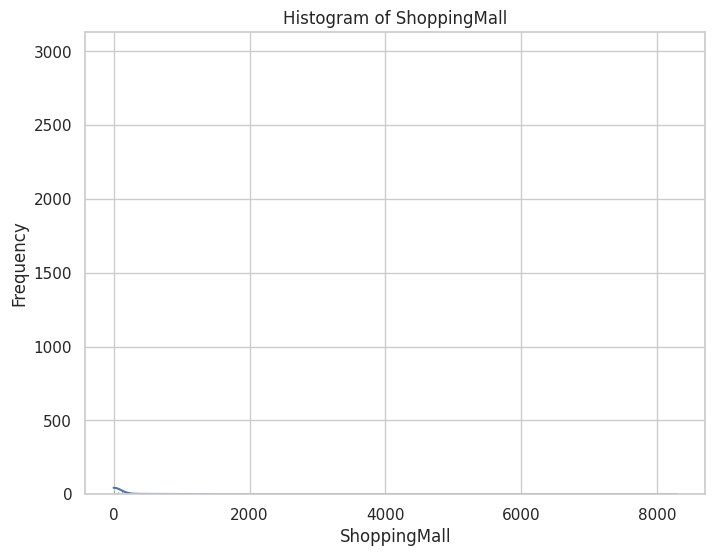

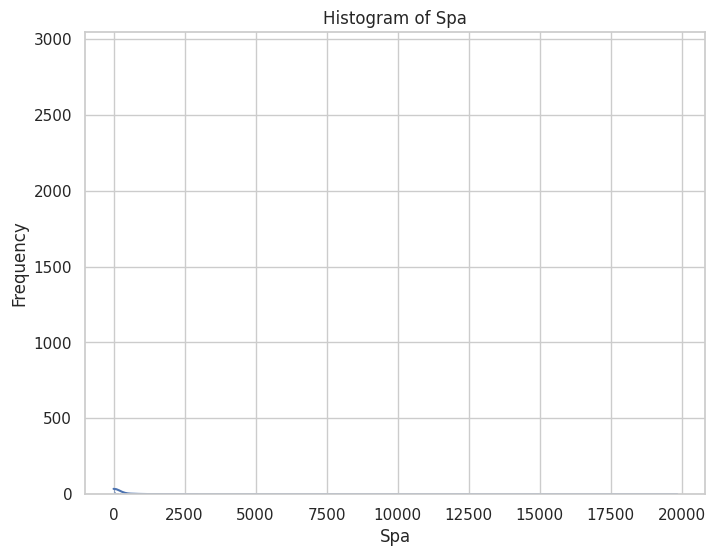

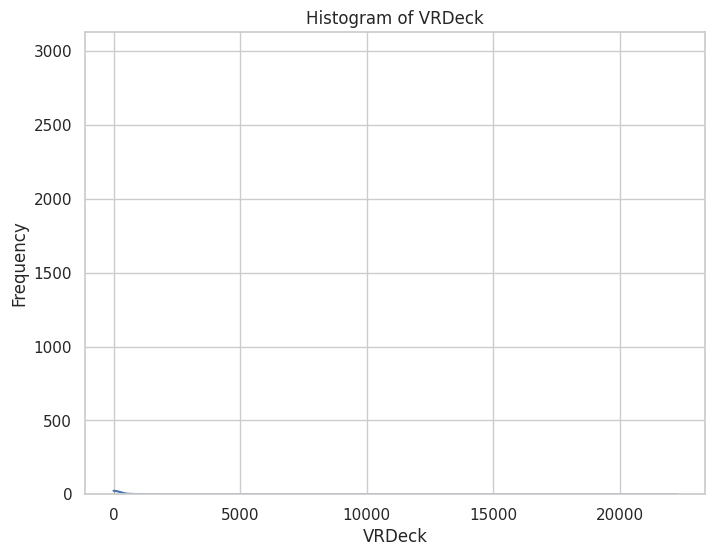

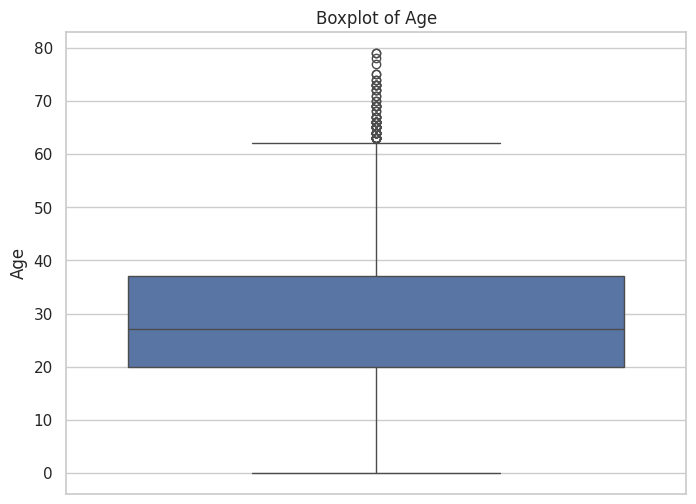

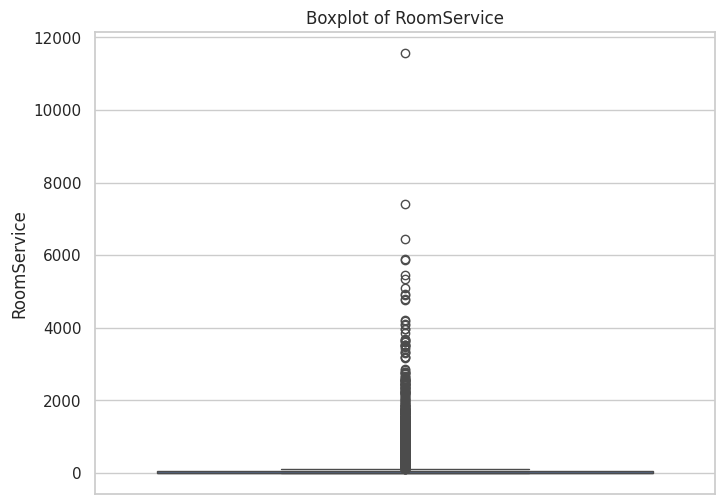

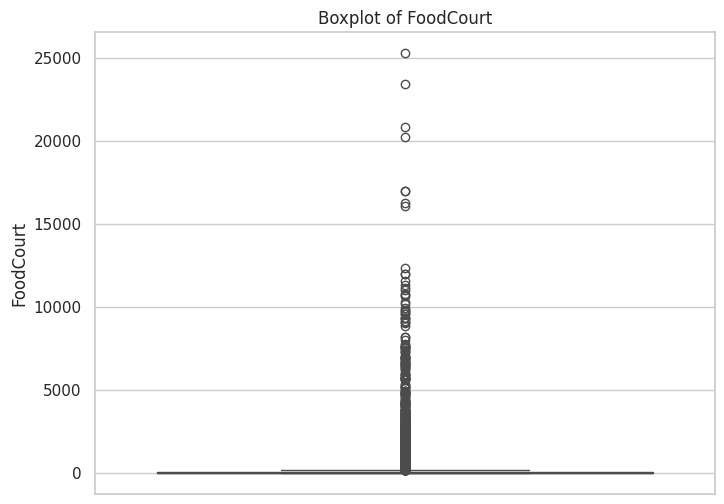

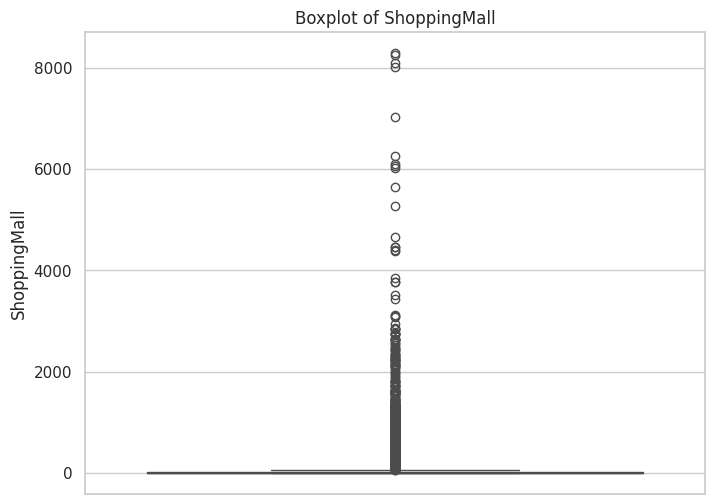

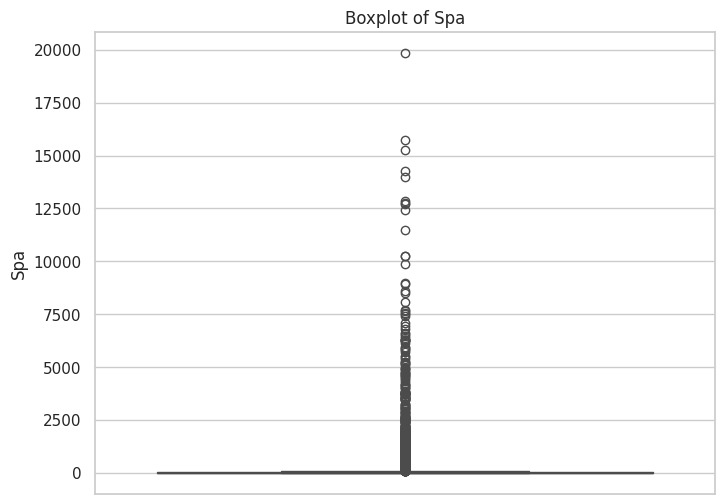

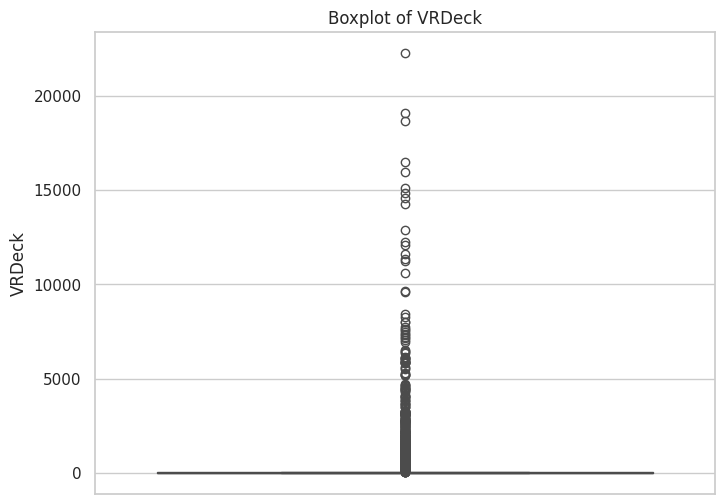

<ipython-input-34-c672f95f15ed>:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_test2.corr(), annot=True, cmap='coolwarm', fmt=".2f")


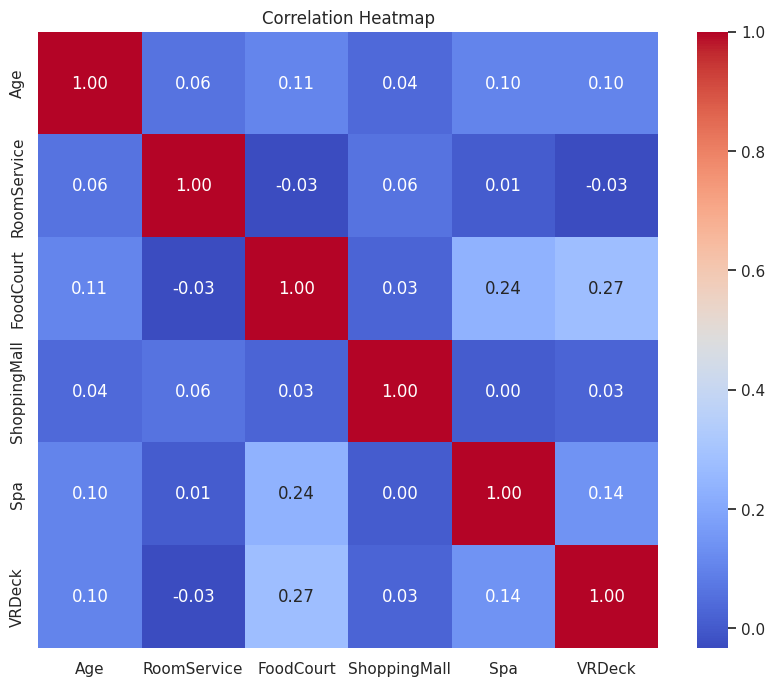

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Count plot for categorical columns
categorical_columns = df_test2.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_test2, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Histogram for numeric columns
numeric_columns = df_test2.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_test2, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Boxplot for numeric columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_test2, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_test2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Scatter plot**

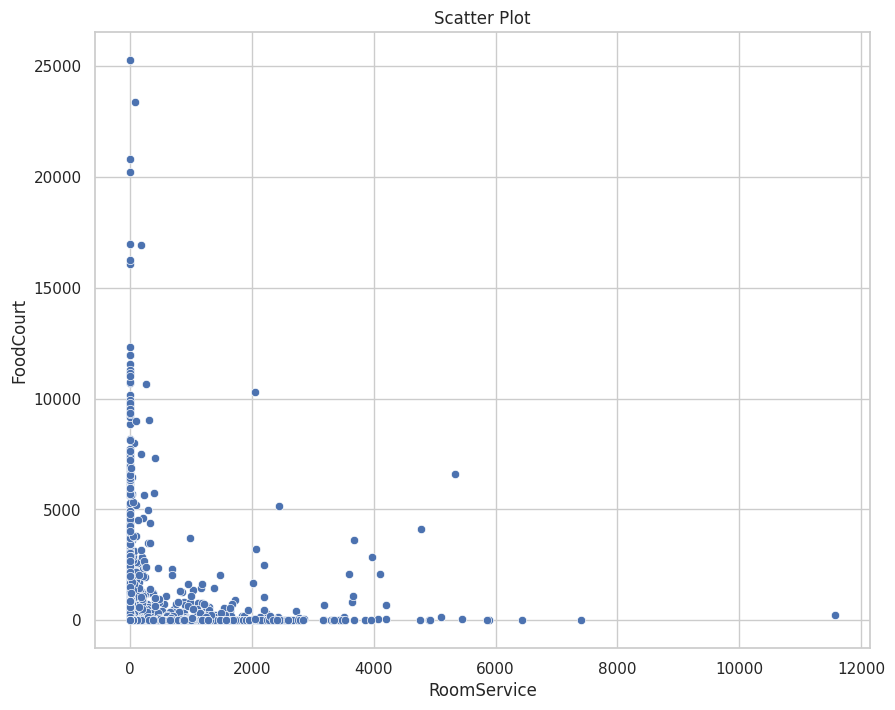

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_test2, x='RoomService', y='FoodCourt')
plt.title('Scatter Plot')
plt.xlabel('RoomService')
plt.ylabel('FoodCourt')
plt.show()


**Pie Chart**

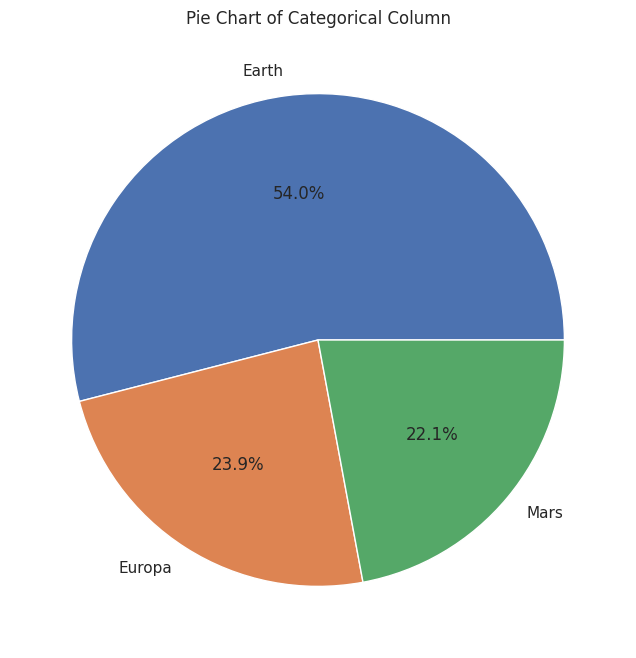

In [ ]:
plt.figure(figsize=(8, 8))
df_test2['HomePlanet'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Categorical Column')
plt.ylabel('')
plt.show()


**Bar Chart**

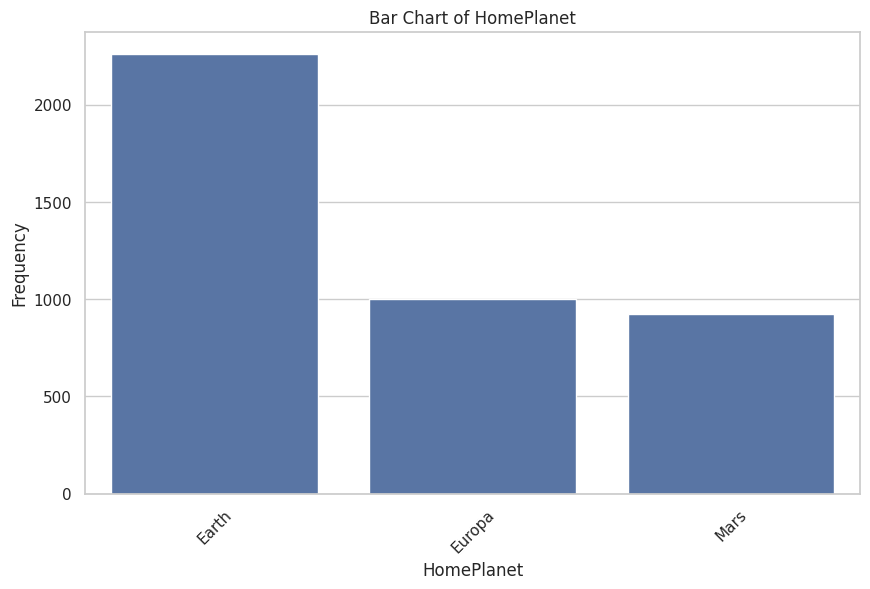

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select a categorical column to plot
categorical_column = 'HomePlanet'

# Count the frequency of each category
category_counts = df_test2[categorical_column].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title(f'Bar Chart of {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
categorical_columns_test = df_test2.select_dtypes(include=['object', 'category'])
categorical_columns_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez
...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,False,Kitakan Conale


**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encode = LabelEncoder()

In [ ]:
labels = label_encode.fit_transform(df_train2['HomePlanet'])
df_train2['HomePlanet'] = labels
df_train2['HomePlanet'].fillna(df_train2['HomePlanet'].mode(),inplace=True)
df_train2.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [ ]:
labels = label_encode.fit_transform(df_test2['HomePlanet'])
df_test2['HomePlanet'] = labels
df_test2['HomePlanet'].fillna(df_test2['HomePlanet'].mode(),inplace=True)
df_test2.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [ ]:
labels = label_encode.fit_transform(df_train2['CryoSleep'])
df_train2['CryoSleep'] = labels
df_train2['CryoSleep'].fillna(method ='ffill',inplace=True)

In [ ]:
labels = label_encode.fit_transform(df_test2['CryoSleep'])
df_test2['CryoSleep'] = labels
df_test2['CryoSleep'].fillna(method ='ffill',inplace=True)

In [ ]:
labels = label_encode.fit_transform(df_train2['Cabin'])
df_train2['Cabin'] = labels
df_train2['Cabin'].fillna(method ='ffill',inplace=True)

In [ ]:
labels = label_encode.fit_transform(df_test2['Cabin'])
df_test2['Cabin'] = labels
df_test2['Cabin'].fillna(method ='ffill',inplace=True)

In [ ]:
labels = label_encode.fit_transform(df_train2['Destination'])
df_train2['Destination'] = labels
df_train2['Destination'].fillna(method ='ffill',inplace=True)

In [ ]:
labels = label_encode.fit_transform(df_test2['Destination'])
df_test2['Destination'] = labels
df_test2['Destination'].fillna(method ='ffill',inplace=True)

In [ ]:
labels = label_encode.fit_transform(df_train2['VIP'])
df_train2['VIP'] = labels
df_train2['VIP'].fillna(method ='ffill',inplace=True)

In [ ]:
labels = label_encode.fit_transform(df_test2['VIP'])
df_test2['VIP'] = labels
df_test2['VIP'].fillna(method ='ffill',inplace=True)

**Outlier Remove**

In [ ]:
"""
import pandas as pd



# Get numeric columns
numeric_columns = df_test2_encoded.select_dtypes(include=['number']).columns

# Remove outliers using IQR method
df_no_outliers = df_test2_encoded.copy()
for column in numeric_columns:
    # Calculate quartiles
    Q1 = df_test2_encoded[column].quantile(0.25)
    Q3 = df_test2_encoded[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define boundaries for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_no_outliers_test = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

# Print the number of removed outlier rows
print(f'Removed {len(df_test2_encoded) - len(df_no_outliers)} outlier rows')

# Now df_no_outliers contains the DataFrame with outliers removed from all numeric columns using normalization with the IQR method
"""


"\nimport pandas as pd\n\n\n\n# Get numeric columns\nnumeric_columns = df_test2_encoded.select_dtypes(include=['number']).columns\n\n# Remove outliers using IQR method\ndf_no_outliers = df_test2_encoded.copy()\nfor column in numeric_columns:\n    # Calculate quartiles\n    Q1 = df_test2_encoded[column].quantile(0.25)\n    Q3 = df_test2_encoded[column].quantile(0.75)\n    IQR = Q3 - Q1\n\n    # Define boundaries for outliers\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    # Remove outliers\n    df_no_outliers_test = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]\n\n# Print the number of removed outlier rows\nprint(f'Removed {len(df_test2_encoded) - len(df_no_outliers)} outlier rows')\n\n# Now df_no_outliers contains the DataFrame with outliers removed from all numeric columns using normalization with the IQR method\n"

In [ ]:
"""
import pandas as pd



# Get numeric columns
numeric_columns = df_train2_encoded.select_dtypes(include=['number']).columns

# Remove outliers using IQR method
df_no_outliers = df_train2_encoded.copy()
for column in numeric_columns:
    # Calculate quartiles
    Q1 = df_train2_encoded[column].quantile(0.25)
    Q3 = df_train2_encoded[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define boundaries for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_no_outliers_train = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

# Print the number of removed outlier rows
print(f'Removed {len(df_train2_encoded) - len(df_no_outliers)} outlier rows')

# Now df_no_outliers contains the DataFrame with outliers removed from all numeric columns using normalization with the IQR method
"""


"\nimport pandas as pd\n\n\n\n# Get numeric columns\nnumeric_columns = df_train2_encoded.select_dtypes(include=['number']).columns\n\n# Remove outliers using IQR method\ndf_no_outliers = df_train2_encoded.copy()\nfor column in numeric_columns:\n    # Calculate quartiles\n    Q1 = df_train2_encoded[column].quantile(0.25)\n    Q3 = df_train2_encoded[column].quantile(0.75)\n    IQR = Q3 - Q1\n\n    # Define boundaries for outliers\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    # Remove outliers\n    df_no_outliers_train = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]\n\n# Print the number of removed outlier rows\nprint(f'Removed {len(df_train2_encoded) - len(df_no_outliers)} outlier rows')\n\n# Now df_no_outliers contains the DataFrame with outliers removed from all numeric columns using normalization with the IQR method\n"

**Data Standaraization**

**1.Test data**

In [ ]:
#scaler = StandardScaler()

In [ ]:

#scaler.fit(df_test2_encoded)

In [ ]:
#standardied_data = scaler.transform(df_test2_encoded)

In [ ]:
#standardied_data

In [ ]:
#test_df = standardied_data

In [ ]:
#test_df1 = pd.DataFrame(test_df)
#test_df1

**2.Train data**

In [ ]:
#scaler = StandardScaler()

In [ ]:
#scaler.fit(df_train2_encoded)

In [ ]:
#standardied_data1 = scaler.transform(df_train2_encoded)

In [ ]:
#standardied_data1

In [ ]:


dropped = ['PassengerId', 'Name', 'Transported']
X = df_train2.drop(dropped, axis=1)
Y = df_train2['Transported']


dropped_test = ['PassengerId','Name']
X_test = df_test2.drop(dropped_test,axis=1)
X_real_test = df_test2.iloc[:, 1:-1]

In [ ]:
print(X)

      HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  RoomService  \
0              1          0    149            2  39.0    0          0.0   
1              0          0   2184            2  24.0    0        109.0   
2              1          0      1            2  58.0    1         43.0   
3              1          0      1            2  33.0    0          0.0   
4              0          0   2186            2  16.0    0        303.0   
...          ...        ...    ...          ...   ...  ...          ...   
8688           1          0    146            0  41.0    1          0.0   
8689           0          1   5280            1  18.0    0          0.0   
8690           0          0   5285            2  26.0    0          0.0   
8691           1          0   2131            0  32.0    0          0.0   
8692           1          0   2131            2  44.0    0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  
0           0.0           0.0     0.0     0.0  
1  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.02, random_state=1)

***ML MODELS***

**`Random forest`**

**Train Test Split**

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:


rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:

pred1 = rf.predict(X_test)
rf.score(X_test,y_test)

0.8448275862068966

In [ ]:
random = rf

Transported = random.predict(X_real_test)
Transported

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:

sample_sub["Transported"] = Transported


sample_sub.to_csv('sample_submission.csv', index=False)
